In [ ]:
import numpy as np
import tables
import sqlite3
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
cuda = torch.cuda.is_available()
cuda

The fuction h5 files had

In [1]:

import tables

def open_h5_file_read(h5filename):
    """
    Open an existing H5 in read mode.
    Same function as in hdf5_utils, here so we avoid one import
    """
    return tables.open_file(h5filename, mode='r')


def get_num_songs(h5):
    """
    Return the number of songs contained in this h5 file, i.e. the number of rows
    for all basic informations like name, artist, ...
    """
    return h5.root.metadata.songs.nrows

def get_artist_familiarity(h5,songidx=0):
    """
    Get artist familiarity from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.artist_familiarity[songidx]

def get_artist_hotttnesss(h5,songidx=0):
    """
    Get artist hotttnesss from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.artist_hotttnesss[songidx]

def get_artist_id(h5,songidx=0):
    """
    Get artist id from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.artist_id[songidx]

def get_artist_mbid(h5,songidx=0):
    """
    Get artist musibrainz id from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.artist_mbid[songidx]

def get_artist_playmeid(h5,songidx=0):
    """
    Get artist playme id from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.artist_playmeid[songidx]

def get_artist_7digitalid(h5,songidx=0):
    """
    Get artist 7digital id from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.artist_7digitalid[songidx]

def get_artist_latitude(h5,songidx=0):
    """
    Get artist latitude from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.artist_latitude[songidx]

def get_artist_longitude(h5,songidx=0):
    """
    Get artist longitude from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.artist_longitude[songidx]

def get_artist_location(h5,songidx=0):
    """
    Get artist location from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.artist_location[songidx]

def get_artist_name(h5,songidx=0):
    """
    Get artist name from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.artist_name[songidx]

def get_release(h5,songidx=0):
    """
    Get release from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.release[songidx]

def get_release_7digitalid(h5,songidx=0):
    """
    Get release 7digital id from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.release_7digitalid[songidx]

def get_song_id(h5,songidx=0):
    """
    Get song id from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.song_id[songidx]

def get_song_hotttnesss(h5,songidx=0):
    """
    Get song hotttnesss from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.song_hotttnesss[songidx]

def get_title(h5,songidx=0):
    """
    Get title from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.title[songidx]

def get_track_7digitalid(h5,songidx=0):
    """
    Get track 7digital id from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.track_7digitalid[songidx]

def get_similar_artists(h5,songidx=0):
    """
    Get similar artists array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.metadata.songs.nrows == songidx + 1:
        return h5.root.metadata.similar_artists[h5.root.metadata.songs.cols.idx_similar_artists[songidx]:]
    return h5.root.metadata.similar_artists[h5.root.metadata.songs.cols.idx_similar_artists[songidx]:
                                            h5.root.metadata.songs.cols.idx_similar_artists[songidx+1]]

def get_artist_terms(h5,songidx=0):
    """
    Get artist terms array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.metadata.songs.nrows == songidx + 1:
        return h5.root.metadata.artist_terms[h5.root.metadata.songs.cols.idx_artist_terms[songidx]:]
    return h5.root.metadata.artist_terms[h5.root.metadata.songs.cols.idx_artist_terms[songidx]:
                                            h5.root.metadata.songs.cols.idx_artist_terms[songidx+1]]

def get_artist_terms_freq(h5,songidx=0):
    """
    Get artist terms array frequencies. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.metadata.songs.nrows == songidx + 1:
        return h5.root.metadata.artist_terms_freq[h5.root.metadata.songs.cols.idx_artist_terms[songidx]:]
    return h5.root.metadata.artist_terms_freq[h5.root.metadata.songs.cols.idx_artist_terms[songidx]:
                                              h5.root.metadata.songs.cols.idx_artist_terms[songidx+1]]

def get_artist_terms_weight(h5,songidx=0):
    """
    Get artist terms array frequencies. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.metadata.songs.nrows == songidx + 1:
        return h5.root.metadata.artist_terms_weight[h5.root.metadata.songs.cols.idx_artist_terms[songidx]:]
    return h5.root.metadata.artist_terms_weight[h5.root.metadata.songs.cols.idx_artist_terms[songidx]:
                                                h5.root.metadata.songs.cols.idx_artist_terms[songidx+1]]

def get_analysis_sample_rate(h5,songidx=0):
    """
    Get analysis sample rate from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.analysis_sample_rate[songidx]

def get_audio_md5(h5,songidx=0):
    """
    Get audio MD5 from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.audio_md5[songidx]

def get_danceability(h5,songidx=0):
    """
    Get danceability from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.danceability[songidx]

def get_duration(h5,songidx=0):
    """
    Get duration from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.duration[songidx]

def get_end_of_fade_in(h5,songidx=0):
    """
    Get end of fade in from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.end_of_fade_in[songidx]

def get_energy(h5,songidx=0):
    """
    Get energy from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.energy[songidx]

def get_key(h5,songidx=0):
    """
    Get key from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.key[songidx]

def get_key_confidence(h5,songidx=0):
    """
    Get key confidence from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.key_confidence[songidx]

def get_loudness(h5,songidx=0):
    """
    Get loudness from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.loudness[songidx]

def get_mode(h5,songidx=0):
    """
    Get mode from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.mode[songidx]

def get_mode_confidence(h5,songidx=0):
    """
    Get mode confidence from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.mode_confidence[songidx]

def get_start_of_fade_out(h5,songidx=0):
    """
    Get start of fade out from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.start_of_fade_out[songidx]

def get_tempo(h5,songidx=0):
    """
    Get tempo from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.tempo[songidx]

def get_time_signature(h5,songidx=0):
    """
    Get signature from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.time_signature[songidx]

def get_time_signature_confidence(h5,songidx=0):
    """
    Get signature confidence from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.time_signature_confidence[songidx]

def get_track_id(h5,songidx=0):
    """
    Get track id from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.track_id[songidx]

def get_segments_start(h5,songidx=0):
    """
    Get segments start array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.segments_start[h5.root.analysis.songs.cols.idx_segments_start[songidx]:]
    return h5.root.analysis.segments_start[h5.root.analysis.songs.cols.idx_segments_start[songidx]:
                                           h5.root.analysis.songs.cols.idx_segments_start[songidx+1]]
    
def get_segments_confidence(h5,songidx=0):
    """
    Get segments confidence array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.segments_confidence[h5.root.analysis.songs.cols.idx_segments_confidence[songidx]:]
    return h5.root.analysis.segments_confidence[h5.root.analysis.songs.cols.idx_segments_confidence[songidx]:
                                                h5.root.analysis.songs.cols.idx_segments_confidence[songidx+1]]

def get_segments_pitches(h5,songidx=0):
    """
    Get segments pitches array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.segments_pitches[h5.root.analysis.songs.cols.idx_segments_pitches[songidx]:,:]
    return h5.root.analysis.segments_pitches[h5.root.analysis.songs.cols.idx_segments_pitches[songidx]:
                                             h5.root.analysis.songs.cols.idx_segments_pitches[songidx+1],:]

def get_segments_timbre(h5,songidx=0):
    """
    Get segments timbre array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.segments_timbre[h5.root.analysis.songs.cols.idx_segments_timbre[songidx]:,:]
    return h5.root.analysis.segments_timbre[h5.root.analysis.songs.cols.idx_segments_timbre[songidx]:
                                            h5.root.analysis.songs.cols.idx_segments_timbre[songidx+1],:]

def get_segments_loudness_max(h5,songidx=0):
    """
    Get segments loudness max array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.segments_loudness_max[h5.root.analysis.songs.cols.idx_segments_loudness_max[songidx]:]
    return h5.root.analysis.segments_loudness_max[h5.root.analysis.songs.cols.idx_segments_loudness_max[songidx]:
                                                  h5.root.analysis.songs.cols.idx_segments_loudness_max[songidx+1]]

def get_segments_loudness_max_time(h5,songidx=0):
    """
    Get segments loudness max time array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.segments_loudness_max_time[h5.root.analysis.songs.cols.idx_segments_loudness_max_time[songidx]:]
    return h5.root.analysis.segments_loudness_max_time[h5.root.analysis.songs.cols.idx_segments_loudness_max_time[songidx]:
                                                       h5.root.analysis.songs.cols.idx_segments_loudness_max_time[songidx+1]]

def get_segments_loudness_start(h5,songidx=0):
    """
    Get segments loudness start array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.segments_loudness_start[h5.root.analysis.songs.cols.idx_segments_loudness_start[songidx]:]
    return h5.root.analysis.segments_loudness_start[h5.root.analysis.songs.cols.idx_segments_loudness_start[songidx]:
                                                    h5.root.analysis.songs.cols.idx_segments_loudness_start[songidx+1]]

def get_sections_start(h5,songidx=0):
    """
    Get sections start array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.sections_start[h5.root.analysis.songs.cols.idx_sections_start[songidx]:]
    return h5.root.analysis.sections_start[h5.root.analysis.songs.cols.idx_sections_start[songidx]:
                                           h5.root.analysis.songs.cols.idx_sections_start[songidx+1]]

def get_sections_confidence(h5,songidx=0):
    """
    Get sections confidence array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.sections_confidence[h5.root.analysis.songs.cols.idx_sections_confidence[songidx]:]
    return h5.root.analysis.sections_confidence[h5.root.analysis.songs.cols.idx_sections_confidence[songidx]:
                                                h5.root.analysis.songs.cols.idx_sections_confidence[songidx+1]]

def get_beats_start(h5,songidx=0):
    """
    Get beats start array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.beats_start[h5.root.analysis.songs.cols.idx_beats_start[songidx]:]
    return h5.root.analysis.beats_start[h5.root.analysis.songs.cols.idx_beats_start[songidx]:
                                        h5.root.analysis.songs.cols.idx_beats_start[songidx+1]]

def get_beats_confidence(h5,songidx=0):
    """
    Get beats confidence array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.beats_confidence[h5.root.analysis.songs.cols.idx_beats_confidence[songidx]:]
    return h5.root.analysis.beats_confidence[h5.root.analysis.songs.cols.idx_beats_confidence[songidx]:
                                             h5.root.analysis.songs.cols.idx_beats_confidence[songidx+1]]

def get_bars_start(h5,songidx=0):
    """
    Get bars start array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.bars_start[h5.root.analysis.songs.cols.idx_bars_start[songidx]:]
    return h5.root.analysis.bars_start[h5.root.analysis.songs.cols.idx_bars_start[songidx]:
                                       h5.root.analysis.songs.cols.idx_bars_start[songidx+1]]

def get_bars_confidence(h5,songidx=0):
    """
    Get bars start array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.bars_confidence[h5.root.analysis.songs.cols.idx_bars_confidence[songidx]:]
    return h5.root.analysis.bars_confidence[h5.root.analysis.songs.cols.idx_bars_confidence[songidx]:
                                            h5.root.analysis.songs.cols.idx_bars_confidence[songidx+1]]

def get_tatums_start(h5,songidx=0):
    """
    Get tatums start array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.tatums_start[h5.root.analysis.songs.cols.idx_tatums_start[songidx]:]
    return h5.root.analysis.tatums_start[h5.root.analysis.songs.cols.idx_tatums_start[songidx]:
                                         h5.root.analysis.songs.cols.idx_tatums_start[songidx+1]]

def get_tatums_confidence(h5,songidx=0):
    """
    Get tatums confidence array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.tatums_confidence[h5.root.analysis.songs.cols.idx_tatums_confidence[songidx]:]
    return h5.root.analysis.tatums_confidence[h5.root.analysis.songs.cols.idx_tatums_confidence[songidx]:
                                              h5.root.analysis.songs.cols.idx_tatums_confidence[songidx+1]]

def get_artist_mbtags(h5,songidx=0):
    """
    Get artist musicbrainz tag array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.musicbrainz.songs.nrows == songidx + 1:
        return h5.root.musicbrainz.artist_mbtags[h5.root.musicbrainz.songs.cols.idx_artist_mbtags[songidx]:]
    return h5.root.musicbrainz.artist_mbtags[h5.root.metadata.songs.cols.idx_artist_mbtags[songidx]:
                                             h5.root.metadata.songs.cols.idx_artist_mbtags[songidx+1]]

def get_artist_mbtags_count(h5,songidx=0):
    """
    Get artist musicbrainz tag count array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.musicbrainz.songs.nrows == songidx + 1:
        return h5.root.musicbrainz.artist_mbtags_count[h5.root.musicbrainz.songs.cols.idx_artist_mbtags[songidx]:]
    return h5.root.musicbrainz.artist_mbtags_count[h5.root.metadata.songs.cols.idx_artist_mbtags[songidx]:
                                                   h5.root.metadata.songs.cols.idx_artist_mbtags[songidx+1]]

def get_year(h5,songidx=0):
    """
    Get release year from a HDF5 song file, by default the first song in it
    """
    return h5.root.musicbrainz.songs.cols.year[songidx]

Connect the sqlite database with lyrics

In [5]:

# Put all track_id into a list
trackid_list = []



conn = sqlite3.connect('/ccs2/mxm_dataset.db')

import sqlite3

def get_lyrics_for_song(conn, track_id):
   
    # build the query
    q = "SELECT word, count FROM lyrics WHERE track_id='%s' " % track_id

    # execute the query
    res = conn.execute(q)

    # get the result
    return res.fetchall()


# Example usage
db_path = '/path/to/your/mxm_dataset.db'

def get_lyrics_for_song_id(conn, song_id):
    """
    Get the lyrics for a song
    """
    # build the query
    q = "SELECT word, count FROM lyrics WHERE track_id=(SELECT mxm_tid FROM lyrics WHERE track_id='%s')" % song_id

    # execute the query
    res = conn.execute(q)

    # get the result
    return res.fetchall()

def get_lyrics_for_song_title(conn, title):
    """
    Get the lyrics for a song
    """
    # build the query
    q = "SELECT word, count FROM lyrics WHERE track_id=(SELECT mxm_tid FROM songs WHERE title='%s')" % title

    # execute the query
    res = conn.execute(q)

    # get the result
    return res.fetchall()

def get_lyrics_for_song_artist(conn, artist):
    """
    Get the lyrics for a song
    """
    # build the query
    q = "SELECT word, count FROM lyrics WHERE track_id=(SELECT mxm_tid FROM songs WHERE artist='%s')" % artist

    # execute the query
    res = conn.execute(q)

    # get the result
    return res.fetchall()

def get_lyrics_for_song_artist_title(conn, artist, title):
    """
    Get the lyrics for a song
    """
    # build the query
    q = "SELECT word, count FROM lyrics WHERE track_id=(SELECT mxm_tid FROM songs WHERE artist='%s' AND title='%s')" % (artist, title)

    # execute the query
    res = conn.execute(q)

    # get the result
    return res.fetchall()

def get_lyrics_for_song_id(conn, song_id):
    """
    Get the lyrics for a song
    """
    # build the query
    q = "SELECT word, count FROM lyrics WHERE track_id=(SELECT mxm_tid FROM songs WHERE track_id='%s')" % song_id

    # execute the query
    res = conn.execute(q)

    # get the result
    return res.fetchall()

def get_lyrics_for_song_title(conn, title):
    """
    Get the lyrics for a song
    """
    # build the query
    q = "SELECT word, count FROM lyrics WHERE track_id=(SELECT mxm_tid FROM songs WHERE title='%s')" % title

    # execute the query
    res = conn.execute(q)

    # get the result
    return res.fetchall()

def get_lyrics_for_song_artist(conn, artist):
    """
    Get the lyrics for a song
    """
    # build the query
    q = "SELECT word, count FROM lyrics WHERE track_id=(SELECT mxm_tid FROM songs WHERE artist='%s')" % artist

    # execute the query
    res = conn.execute(q)

    # get the result
    return res.fetchall()

def get_lyrics_for_song_artist_title(conn, artist, title):
    """
    Get the lyrics for a song
    """
    # build the query
    q = "SELECT word, count FROM lyrics WHERE track_id=(SELECT mxm_tid FROM songs WHERE artist='%s' AND title='%s')" % (artist, title)

    # execute the query
    res = conn.execute(q)

    # get the result
    return res.fetchall()


# open the database
conn = sqlite3.connect('/ccs2/mxm_dataset.db')

# get the lyrics for a song
lyrics = get_lyrics_for_song(conn, 'TRAAABD128F429CF47')    
print(lyrics)

conn.close()
conn1.close()

[('table', 'songs', 'songs', 2, 'CREATE TABLE songs (track_id text PRIMARY KEY, title text, song_id text, release text, artist_id text, artist_mbid text, artist_name text, duration real, artist_familiarity real, artist_hotttnesss real, year int, track_7digitalid int, shs_perf int, shs_work int)')]
[('i', 10), ('you', 17), ('to', 8), ('and', 2), ('a', 2), ('me', 1), ('it', 3), ('not', 2), ('in', 3), ('my', 4), ('is', 3), ('your', 7), ('that', 5), ('do', 5), ('are', 6), ('for', 4), ('no', 1), ('have', 6), ('so', 2), ('know', 5), ('but', 3), ('what', 3), ('when', 2), ('time', 3), ('can', 1), ('there', 5), ('la', 7), ('get', 2), ('got', 3), ('never', 2), ('feel', 2), ('want', 2), ('would', 2), ('day', 4), ('away', 2), ('yeah', 4), ('heart', 5), ('could', 2), ('need', 3), ('our', 2), ('look', 2), ('where', 2), ('thing', 2), ('think', 1), ('live', 1), ('onli', 2), ('tri', 1), ('keep', 3), ('dream', 2), ('wanna', 3), ('find', 3), ('hear', 1), ('believ', 1), ('everyth', 2), ('someth', 4), ('in

Count all datas

In [11]:
import os

def process_h5_files(root_directory):
    """
    遍历指定目录下的所有.h5文件，并提取文件名中的ID
    """
    song_ids = set()  
    for subdir, _, files in os.walk(root_directory):
        for file in files:
            if file.endswith('.h5'):
                file_path = os.path.join(subdir, file)
                song_id = file[:-3]  
                song_ids.add(song_id) 
                print(song_id) 

    return song_ids

# 示例用法
root_directory = 'E:\\ccs2\\millionsongsubset\\MillionSongSubset'
all_song_ids = process_h5_files(root_directory)
print(f'Total unique song IDs collected: {len(all_song_ids)}')


TRAAAAW128F429D538
TRAAABD128F429CF47
TRAAADZ128F9348C2E
TRAAAEF128F4273421
TRAAAFD128F92F423A
TRAAAMO128F1481E7F
TRAAAMQ128F1460CD3
TRAAAPK128E0786D96
TRAAARJ128F9320760
TRAAAVG12903CFA543
TRAAAVO128F93133D4
TRAABCL128F4286650
TRAABDL12903CAABBA
TRAABJL12903CDCF1A
TRAABJV128F1460C49
TRAABLR128F423B7E3
TRAABNV128F425CEE1
TRAABRB128F9306DD5
TRAABVM128F92CA9DC
TRAABXG128F9318EBD
TRAABYN12903CFD305
TRAABYW128F4244559
TRAACCG128F92E8A55
TRAACER128F4290F96
TRAACFV128F935E50B
TRAACHN128F1489601
TRAACIW12903CC0F6D
TRAACLV128F427E123
TRAACNS128F14A2DF5
TRAACOW128F933E35F
TRAACPE128F421C1B9
TRAACQT128F9331780
TRAACSL128F93462F4
TRAACTB12903CAAF15
TRAACVS128E078BE39
TRAACZK128F4243829
TRAADDS128F425C68B
TRAADED128F42741FD
TRAADEV128F9348C0A
TRAADHS12903CE70A9
TRAADIV12903CB15C1
TRAADLH12903CA70EE
TRAADLN128F14832E9
TRAADLR12903CF8D7E
TRAADLX128F1469250
TRAADMH128F9343E59
TRAADNA128F9331246
TRAADOF12903CAA1C1
TRAADQX128F422B4CF
TRAADRN128F932D607
TRAADVH128EF34DE7A
TRAADYB128F92D7E73
TRAADYI128E0

Find dataset with lyrics(no need to run)

In [12]:
def process_h5_files(root_directory, conn):

    song_ids_with_lyrics = set()  
    for subdir, _, files in os.walk(root_directory):
        for file in files:
            if file.endswith('.h5'):
                song_id = file[:-3]  
                lyrics = get_lyrics_for_song(conn, song_id)
                if lyrics:  
                    song_ids_with_lyrics.add(song_id)  
                    print(f"Lyrics found for {song_id}")
                else:
                    print(f"No lyrics found for {song_id}")

    return song_ids_with_lyrics

conn = sqlite3.connect('/ccs2/mxm_dataset.db')
root_directory = 'E:\\ccs2\\millionsongsubset\\MillionSongSubset'

all_song_ids_with_lyrics = process_h5_files(root_directory, conn)
print(f"Processed {len(all_song_ids_with_lyrics)} unique song IDs with lyrics.")

No lyrics found for TRAAAAW128F429D538
Lyrics found for TRAAABD128F429CF47
No lyrics found for TRAAADZ128F9348C2E
Lyrics found for TRAAAEF128F4273421
Lyrics found for TRAAAFD128F92F423A
No lyrics found for TRAAAMO128F1481E7F
No lyrics found for TRAAAMQ128F1460CD3
No lyrics found for TRAAAPK128E0786D96
Lyrics found for TRAAARJ128F9320760
No lyrics found for TRAAAVG12903CFA543
No lyrics found for TRAAAVO128F93133D4
No lyrics found for TRAABCL128F4286650
No lyrics found for TRAABDL12903CAABBA
No lyrics found for TRAABJL12903CDCF1A
Lyrics found for TRAABJV128F1460C49
Lyrics found for TRAABLR128F423B7E3
No lyrics found for TRAABNV128F425CEE1
No lyrics found for TRAABRB128F9306DD5
Lyrics found for TRAABVM128F92CA9DC
No lyrics found for TRAABXG128F9318EBD
No lyrics found for TRAABYN12903CFD305
No lyrics found for TRAABYW128F4244559
No lyrics found for TRAACCG128F92E8A55
Lyrics found for TRAACER128F4290F96
Lyrics found for TRAACFV128F935E50B
Lyrics found for TRAACHN128F1489601
No lyrics found 

Get tag data from json file

In [13]:
import json

with open('all_song_tags.json', 'r') as json_file:
    loaded_song_tags_dict = json.load(json_file)
print(f"Loaded {len(loaded_song_tags_dict)} song tags from JSON file.")

Loaded 4850 song tags from JSON file.


Tags selection

In [14]:
from collections import Counter
import json

tags_for_songs = loaded_song_tags_dict

all_tags = [tag for tags in tags_for_songs.values() for tag in tags]

tag_counter = Counter(all_tags)

top_tags = [tag for tag, count in tag_counter.most_common(6)]
print("Top Tags:", top_tags)

filtered_songs = {song_id: tags for song_id, tags in tags_for_songs.items() if any(tag in top_tags for tag in tags)}

print("Number of filtered songs:", len(filtered_songs))

Top Tags: ['rock', 'blues', 'pop', 'country', 'Hip-Hop', 'punk']
Number of filtered songs: 1029
1029


Get lyrics data from json file

In [119]:
import json

with open('preprocessed_lyrics_data.json', 'r', encoding='utf-8') as json_file:
    preprocessed_lyrics_data = json.load(json_file)
lyrics_data = preprocessed_lyrics_data

Loaded 1242 preprocessed lyrics data entries from JSON file.


Lyrics train (Simple NN)

In [114]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

filtered_lyrics = []
filtered_labels = []

# Filter out songs that do not have lyrics
for song_id in labels_data.keys():
    if song_id in lyrics_data:
        filtered_lyrics.append(lyrics_data[song_id])
        filtered_labels.append(labels_data[song_id])

print(f"Number of samples: {len(filtered_labels)}")

# Check if any samples were found
if len(filtered_labels) == 0:
    raise ValueError("No samples found with the specified tags.")

# Use TF-IDF to vectorize the lyrics
tfidf = TfidfVectorizer(stop_words='english')
X_lyrics = tfidf.fit_transform(filtered_lyrics).toarray()
y = filtered_labels

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Custom dataset class
class LyricsDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lyrics, y_encoded, test_size=0.3, random_state=42)

# Create data loaders
train_dataset = LyricsDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
test_dataset = LyricsDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleNN(input_dim=X_lyrics.shape[1], hidden_dim=128, output_dim=len(label_encoder.classes_)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#  Early stopping
class EarlyStopping:
    def __init__(self, patience=5, delta=0):
        self.patience = patience
        self.delta = delta
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss

early_stopping = EarlyStopping(patience=5, delta=0)

#  Train the model
model.train()
for epoch in range(20):  # 最大训练轮次
    train_loss = 0.0
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss = train_loss / len(train_loader)
    
    # Evaluate the model
    val_loss = 0.0
    all_preds = []
    all_labels = []
    model.eval()
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())
    
    val_loss = val_loss / len(test_loader)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
    print(f'Epoch {epoch+1}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, F1 Score: {f1:.4f}')

    early_stopping(val_loss, model)
    
    if early_stopping.early_stop:
        print(f"Early stopping at epoch {epoch+1}")
        break

model.load_state_dict(torch.load('checkpoint.pt'))
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

accuracy = correct / total
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


Number of samples: 952


d:\ANA\envs\l_process\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1, Training Loss: 1.7720, Validation Loss: 1.7144, F1 Score: 0.2149


d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 2, Training Loss: 1.5488, Validation Loss: 1.5903, F1 Score: 0.2627


d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 3, Training Loss: 1.1457, Validation Loss: 1.4586, F1 Score: 0.4163
Epoch 4, Training Loss: 0.6650, Validation Loss: 1.3994, F1 Score: 0.4902
Epoch 5, Training Loss: 0.3296, Validation Loss: 1.3670, F1 Score: 0.4875
Epoch 6, Training Loss: 0.1718, Validation Loss: 1.3925, F1 Score: 0.4635
EarlyStopping counter: 1 out of 5
Epoch 7, Training Loss: 0.1152, Validation Loss: 1.3974, F1 Score: 0.4773
EarlyStopping counter: 2 out of 5
Epoch 8, Training Loss: 0.0866, Validation Loss: 1.4156, F1 Score: 0.4753
EarlyStopping counter: 3 out of 5
Epoch 9, Training Loss: 0.0705, Validation Loss: 1.4308, F1 Score: 0.4899
EarlyStopping counter: 4 out of 5
Epoch 10, Training Loss: 0.0613, Validation Loss: 1.4465, F1 Score: 0.4821
EarlyStopping counter: 5 out of 5
Early stopping at epoch 10
Test Accuracy: 49.65%
Test Precision: 0.4973
Test Recall: 0.4965
Test F1 Score: 0.4875


Lyrics train (LSTM) and plot the tag distribution

Total number of songs before preprocessing: 952
Total number of songs after preprocessing and filtering: 952
Total number of songs used for training: 952


d:\ANA\envs\l_process\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


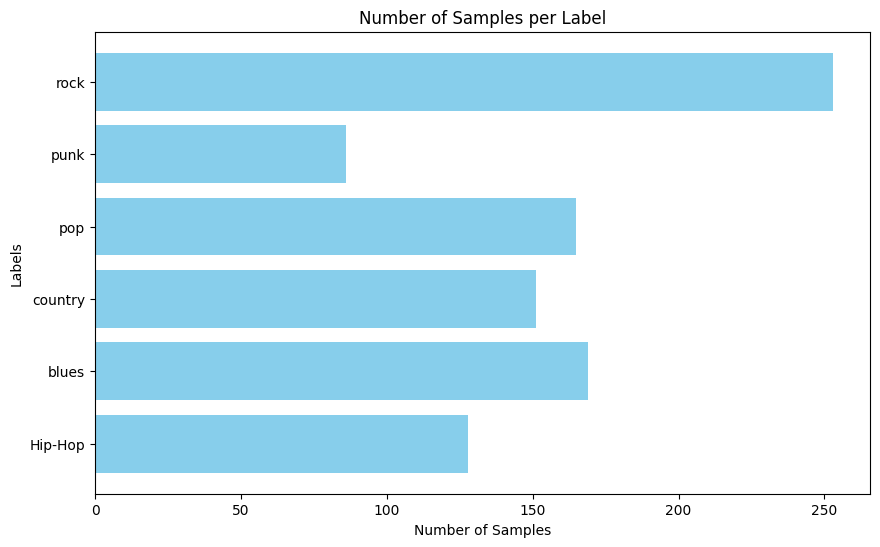

Epoch 1, Training Loss: 1.7937
Epoch 1, Validation Loss: 1.7896, F1 Score: 0.0509


d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 2, Training Loss: 1.7866
Epoch 2, Validation Loss: 1.7872, F1 Score: 0.0509


d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 3, Training Loss: 1.7612
Epoch 3, Validation Loss: 1.7703, F1 Score: 0.2390
Epoch 4, Training Loss: 1.6498
Epoch 4, Validation Loss: 1.7050, F1 Score: 0.2484
Epoch 5, Training Loss: 1.3422
Epoch 5, Validation Loss: 1.5763, F1 Score: 0.3222
Epoch 6, Training Loss: 0.8716
Epoch 6, Validation Loss: 1.5018, F1 Score: 0.4356
Epoch 7, Training Loss: 0.5032
Epoch 7, Validation Loss: 1.4512, F1 Score: 0.4753
Epoch 8, Training Loss: 0.3003
Epoch 8, Validation Loss: 1.4797, F1 Score: 0.4984
Epoch 9, Training Loss: 0.1956
Epoch 9, Validation Loss: 1.5658, F1 Score: 0.5032
Epoch 10, Training Loss: 0.1322
Epoch 10, Validation Loss: 1.6355, F1 Score: 0.5085
Epoch 11, Training Loss: 0.1182
Epoch 11, Validation Loss: 1.6896, F1 Score: 0.5281
Epoch 12, Training Loss: 0.1025
Epoch 12, Validation Loss: 1.7246, F1 Score: 0.5014
Epoch 13, Training Loss: 0.0734
Epoch 13, Validation Loss: 1.7330, F1 Score: 0.5039
Epoch 14, Training Loss: 0.0744
Epoch 14, Validation Loss: 1.8373, F1 Score: 0.5139
Epoch 

In [100]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt

def preprocess_lyrics(lyrics):
    lyrics = lyrics.lower()
    lyrics = lyrics.replace('\n', ' ')
    return lyrics


print(f"Total number of songs before preprocessing: {len(lyrics_data)}")

preprocessed_lyrics_data = {song_id: preprocess_lyrics(lyrics) for song_id, lyrics in lyrics_data.items()}

filtered_lyrics_data = {song_id: lyrics for song_id, lyrics in preprocessed_lyrics_data.items() if lyrics.strip()}

print(f"Total number of songs after preprocessing and filtering: {len(filtered_lyrics_data)}")

filtered_labels_data = {song_id: filtered_songs[song_id] for song_id in filtered_lyrics_data.keys() if song_id in filtered_songs}

filtered_lyrics_data = {song_id: lyrics for song_id, lyrics in filtered_lyrics_data.items() if song_id in filtered_labels_data}

print(f"Total number of songs used for training: {len(filtered_lyrics_data)}")

lyrics_data = filtered_lyrics_data 
labels_data = filtered_labels_data 

tfidf = TfidfVectorizer(stop_words='english')  
corpus = list(lyrics_data.values())
X_lyrics = tfidf.fit_transform(corpus)

label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform([labels_data[song_id] for song_id in lyrics_data.keys()])

class_weights = compute_class_weight('balanced', classes=np.unique(y_labels), y=y_labels)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

label_counts = np.bincount(y_labels)
labels = label_encoder.inverse_transform(np.arange(len(label_counts)))

plt.figure(figsize=(10, 6))
plt.barh(labels, label_counts, color='skyblue')
plt.xlabel('Number of Samples')
plt.ylabel('Labels')
plt.title('Number of Samples per Label')
plt.show()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X_lyrics.toarray(), dtype=torch.float32).to(device)
y_tensor = torch.tensor(y_labels, dtype=torch.long).to(device)

X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=2, batch_first=True, dropout=0.5)  
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.unsqueeze(1)  
        out, (hn, _) = self.lstm(x)
        out = self.fc(hn[-1])  
        return out

model = LSTMModel(input_dim=X_tensor.shape[1], hidden_dim=128, output_dim=len(label_encoder.classes_)).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)  

best_val_loss = float('inf')
early_stopping_patience = 10
patience_counter = 0

for epoch in range(20):  
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    print(f"Epoch {epoch+1}, Training Loss: {train_loss:.4f}")

    model.eval()
    val_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())
            
        val_loss /= len(val_loader)
        precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
        print(f"Epoch {epoch+1}, Validation Loss: {val_loss:.4f}, F1 Score: {f1:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    for X_batch, y_batch in val_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

accuracy = correct / total
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")
print(f"Validation F1 Score: {f1:.4f}")


Get data of pitches & timbre

In [23]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import os
import h5py

data_directory = 'E:\\ccs2\\millionsongsubset\\MillionSongSubset'
lyrics_data = filtered_lyrics_data  
labels_data = filtered_labels_data  

song_ids_tags = filtered_labels_data

song_ids_pitches = {}
song_ids_timbre = {}

for subdir, dirs, files in os.walk(data_directory):
    for file in files:
        if file.endswith('.h5'):
            song_id = file[:-3]  
            if song_id in song_ids_tags:
                file_path = os.path.join(subdir, file)
                try:
                    with h5py.File(file_path, 'r') as h5_file:

                        pitches = h5_file['analysis']['segments_pitches'][:]
                        timbre = h5_file['analysis']['segments_timbre'][:]
                        song_ids_pitches[song_id] = pitches
                        song_ids_timbre[song_id] = timbre
                        print(f"Found features for song_id {song_id}")
                except Exception as e:
                    print(f"Error processing file {file_path}: {e}")

print(len(song_ids_pitches), len(song_ids_timbre), len(song_ids_tags))

Found features for song_id TRAACTB12903CAAF15
Found features for song_id TRAADOF12903CAA1C1
Found features for song_id TRAADVH128EF34DE7A
Found features for song_id TRAAEAM128F934B199
Found features for song_id TRAAFJW128F428A424
Found features for song_id TRAAFYL128E07856A7
Found features for song_id TRAAGCZ128F93210FD
Found features for song_id TRAAGPF12903CE027E
Found features for song_id TRAAGPH128F4273C8D
Found features for song_id TRAAHEG128E07861C3
Found features for song_id TRAAIAE128F42AC53D
Found features for song_id TRAAKDF128F92FA302
Found features for song_id TRAAKTK128F9343DCC
Found features for song_id TRAALZC128F92E11A6
Found features for song_id TRAAMPA128F92E7D0D
Found features for song_id TRAAPSQ12903CAE86A
Found features for song_id TRAAQCK128F92E8C33
Found features for song_id TRAAQUF12903CDF4A4
Found features for song_id TRAASZE128F93499AE
Found features for song_id TRAATGM12903C9CD7C
Found features for song_id TRAATMY128F149562F
Found features for song_id TRAAVAH

In [ ]:
print(len(filtered_lyrics_data))

952


Get the data of tempo & loudness

In [19]:
import os
import h5py

data_directory = 'E:\\ccs2\\millionsongsubset\\MillionSongSubset'

song_ids_tags = preprocessed_lyrics_data

loudness_data = {}
tempo_data = {}

for subdir, dirs, files in os.walk(data_directory):
    for file in files:
        if file.endswith('.h5'):
            song_id = file.split('.h5')[0].split('\\')[-1]  
            if song_id in song_ids_tags:
                file_path = os.path.join(subdir, file)
                try:
                    with h5py.File(file_path, 'r') as h5_file:

                        loudness = h5_file['analysis']['songs']['loudness'][0]
                        tempo = h5_file['analysis']['songs']['tempo'][0]
                        loudness_data[song_id] = loudness
                        tempo_data[song_id] = tempo
                        print(f"Found loudness {loudness} and tempo {tempo} for song_id {song_id}")
                except Exception as e:
                    print(f"Error processing file {file_path}: {e}")


print(f"Number of songs with loudness data: {len(loudness_data)}")
print(f"Number of songs with tempo data: {len(tempo_data)}")


Found loudness -5.271 and tempo 150.062 for song_id TRAABVM128F92CA9DC
Found loudness -11.939 and tempo 110.189 for song_id TRAACPE128F421C1B9
Found loudness -9.983 and tempo 160.839 for song_id TRAACTB12903CAAF15
Found loudness -10.7 and tempo 123.142 for song_id TRAADOF12903CAA1C1
Found loudness -9.253 and tempo 154.953 for song_id TRAADVH128EF34DE7A
Found loudness -12.009 and tempo 86.091 for song_id TRAADYB128F92D7E73
Found loudness -11.506 and tempo 133.144 for song_id TRAAEAM128F934B199
Found loudness -7.787 and tempo 152.622 for song_id TRAAFJW128F428A424
Found loudness -4.865 and tempo 140.995 for song_id TRAAFYL128E07856A7
Found loudness -4.882 and tempo 105.206 for song_id TRAAGCZ128F93210FD
Found loudness -11.98 and tempo 91.487 for song_id TRAAGPF12903CE027E
Found loudness -11.215 and tempo 84.69 for song_id TRAAGPH128F4273C8D
Found loudness -10.296 and tempo 85.008 for song_id TRAAHEG128E07861C3
Found loudness -13.627 and tempo 100.194 for song_id TRAAIAE128F42AC53D
Found 

Tempo & loudness (Simple NN)

In [116]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

filtered_loudness = []
filtered_tempo = []
filtered_labels = []

for song_id in labels_data.keys():
    if song_id in loudness_data and song_id in tempo_data:
        filtered_loudness.append(loudness_data[song_id])
        filtered_tempo.append(tempo_data[song_id])
        filtered_labels.append(labels_data[song_id])

print(f"Number of samples: {len(filtered_labels)}")

if len(filtered_labels) == 0:
    raise ValueError("No samples found with the specified tags.")

X = np.column_stack((filtered_loudness, filtered_tempo))
y = filtered_labels

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

class LoudnessTempoDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

train_dataset = LoudnessTempoDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
test_dataset = LoudnessTempoDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleNN(input_dim=2, hidden_dim=128, output_dim=len(label_encoder.classes_)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

class EarlyStopping:
    def __init__(self, patience=5, delta=0):
        self.patience = patience
        self.delta = delta
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss

early_stopping = EarlyStopping(patience=5, delta=0)


model.train()
for epoch in range(20):  
    train_loss = 0.0
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss = train_loss / len(train_loader)
    
    val_loss = 0.0
    all_preds = []
    all_labels = []
    model.eval()
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())
    
    val_loss = val_loss / len(test_loader)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
    print(f'Epoch {epoch+1}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, F1 Score: {f1:.4f}')

    early_stopping(val_loss, model)
    
    if early_stopping.early_stop:
        print(f"Early stopping at epoch {epoch+1}")
        break

model.load_state_dict(torch.load('checkpoint.pt'))
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

accuracy = correct / total
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


Number of samples: 952
Epoch 1, Training Loss: 4.6176, Validation Loss: 1.9764, F1 Score: 0.2305
Epoch 2, Training Loss: 2.0910, Validation Loss: 1.7458, F1 Score: 0.2460


d:\ANA\envs\l_process\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Preci

Epoch 3, Training Loss: 1.8981, Validation Loss: 2.0785, F1 Score: 0.2682
EarlyStopping counter: 1 out of 5
Epoch 4, Training Loss: 1.8897, Validation Loss: 1.9588, F1 Score: 0.0793
EarlyStopping counter: 2 out of 5
Epoch 5, Training Loss: 1.7938, Validation Loss: 2.0178, F1 Score: 0.1289
EarlyStopping counter: 3 out of 5
Epoch 6, Training Loss: 1.7476, Validation Loss: 1.9487, F1 Score: 0.1378
EarlyStopping counter: 4 out of 5
Epoch 7, Training Loss: 1.7264, Validation Loss: 1.8740, F1 Score: 0.1164
EarlyStopping counter: 5 out of 5
Early stopping at epoch 7
Test Accuracy: 30.37%
Test Precision: 0.2184
Test Recall: 0.3037
Test F1 Score: 0.2460


d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classif

Multimodal for lyrics & pitches, timbre (LSTM)

In [94]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

tfidf = TfidfVectorizer(stop_words='english')  
corpus = list(lyrics_data.values())
X_lyrics = tfidf.fit_transform(corpus).toarray()

segments_pitches = []
segments_timbre = []
lyrics_features = []
labels = []

for song_id in lyrics_data.keys():
    if song_id in labels_data and song_id in song_ids_pitches and song_id in song_ids_timbre:
        segments_pitches.append(song_ids_pitches[song_id])
        segments_timbre.append(song_ids_timbre[song_id])
        lyrics_features.append(X_lyrics[list(lyrics_data.keys()).index(song_id)])
        labels.append(labels_data[song_id])

print(f'Number of samples: {len(labels)}')

assert len(segments_pitches) == len(segments_timbre) == len(lyrics_features) == len(labels), "Data lengths are inconsistent."

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

# Standardize pitch and timbre data
scaler = StandardScaler()
segments_pitches = [scaler.fit_transform(seq) for seq in segments_pitches]
segments_timbre = [scaler.fit_transform(seq) for seq in segments_timbre]

# Custom dataset class
class MultiModalDataset(Dataset):
    def __init__(self, lyrics_features, pitches_features, timbre_features, labels):
        self.lyrics_features = lyrics_features
        self.pitches_features = pitches_features
        self.timbre_features = timbre_features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.lyrics_features[idx], self.pitches_features[idx], self.timbre_features[idx], self.labels[idx]

def collate_fn(batch):
    lyrics_features, pitches_features, timbre_features, labels = zip(*batch)
    pitches_lengths = [len(seq) for seq in pitches_features]
    timbre_lengths = [len(seq) for seq in timbre_features]

    max_length = max(max(pitches_lengths), max(timbre_lengths))
    
    padded_pitches_features = torch.zeros(len(pitches_features), max_length, 12)
    padded_timbre_features = torch.zeros(len(timbre_features), max_length, 12)

    for i, (pitches_seq, timbre_seq) in enumerate(zip(pitches_features, timbre_features)):
        pitches_end = pitches_lengths[i]
        timbre_end = timbre_lengths[i]
        padded_pitches_features[i, :pitches_end, :] = torch.tensor(pitches_seq, dtype=torch.float32)
        padded_timbre_features[i, :timbre_end, :] = torch.tensor(timbre_seq, dtype=torch.float32)

    lyrics_tensor = torch.tensor(np.array(lyrics_features), dtype=torch.float32)
    labels_tensor = torch.tensor(labels, dtype=torch.long)

    return lyrics_tensor, padded_pitches_features, padded_timbre_features, labels_tensor, pitches_lengths, timbre_lengths


X_lyrics_train, X_lyrics_test, X_pitches_train, X_pitches_test, X_timbre_train, X_timbre_test, y_train, y_test = train_test_split(
    np.array(lyrics_features), segments_pitches, segments_timbre, y_encoded, test_size=0.2, random_state=42)

# Data loaders`
train_dataset = MultiModalDataset(X_lyrics_train, X_pitches_train, X_timbre_train, y_train)
test_dataset = MultiModalDataset(X_lyrics_test, X_pitches_test, X_timbre_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=collate_fn)

# LSTM model definition
class MultiModalLSTMModel(nn.Module):
    def __init__(self, input_dim_lyrics, input_dim_audio, hidden_dim, output_dim):
        super(MultiModalLSTMModel, self).__init__()
        self.lstm_pitches = nn.LSTM(input_dim_audio, hidden_dim, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
        self.lstm_timbre = nn.LSTM(input_dim_audio, hidden_dim, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
        self.fc_lyrics = nn.Linear(input_dim_lyrics, hidden_dim)
        self.fc_combined = nn.Linear(hidden_dim * 5, output_dim)
        self.dropout = nn.Dropout(0.5)

    def forward(self, lyrics, pitches, timbre, pitches_lengths, timbre_lengths):
        packed_pitches = nn.utils.rnn.pack_padded_sequence(pitches, pitches_lengths, batch_first=True, enforce_sorted=False)
        packed_timbre = nn.utils.rnn.pack_padded_sequence(timbre, timbre_lengths, batch_first=True, enforce_sorted=False)
        
        _, (pitches_hn, _) = self.lstm_pitches(packed_pitches)
        _, (timbre_hn, _) = self.lstm_timbre(packed_timbre)
        
        lyrics_output = torch.relu(self.fc_lyrics(lyrics))
        lyrics_output = self.dropout(lyrics_output)

        pitches_output = torch.cat((pitches_hn[-2], pitches_hn[-1]), dim=1)
        timbre_output = torch.cat((timbre_hn[-2], timbre_hn[-1]), dim=1)

        combined = torch.cat((lyrics_output, pitches_output, timbre_output), dim=1)
        output = self.fc_combined(combined)
        return output

# Initialize the model and move it to the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiModalLSTMModel(input_dim_lyrics=X_lyrics_train.shape[1], input_dim_audio=12, hidden_dim=128, output_dim=len(label_encoder.classes_)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Early stopping
class EarlyStopping:
    def __init__(self, patience=5, delta=0):
        self.patience = patience
        self.delta = delta
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss

early_stopping = EarlyStopping(patience=5, delta=0)

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiModalLSTMModel(input_dim_lyrics=X_lyrics_train.shape[1], input_dim_audio=12, hidden_dim=128, output_dim=len(label_encoder.classes_)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model.train()
for epoch in range(20):  
    train_loss = 0.0
    all_train_preds = []
    all_train_labels = []
    model.train()
    for X_lyrics_batch, X_pitches_batch, X_timbre_batch, y_batch, pitches_lengths, timbre_lengths in train_loader:
        X_lyrics_batch, X_pitches_batch, X_timbre_batch, y_batch = (
            X_lyrics_batch.to(device), 
            X_pitches_batch.to(device), 
            X_timbre_batch.to(device), 
            y_batch.to(device)
        )
        optimizer.zero_grad()
        outputs = model(X_lyrics_batch, X_pitches_batch, X_timbre_batch, pitches_lengths, timbre_lengths)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        all_train_preds.extend(predicted.cpu().numpy())
        all_train_labels.extend(y_batch.cpu().numpy())

    train_f1 = precision_recall_fscore_support(all_train_labels, all_train_preds, average='weighted')[2]
    train_loss /= len(train_loader)
    
    # Validation phase
    val_loss = 0.0
    all_val_preds = []
    all_val_labels = []
    model.eval()
    with torch.no_grad():
        for X_lyrics_batch, X_pitches_batch, X_timbre_batch, y_batch, pitches_lengths, timbre_lengths in test_loader:
            X_lyrics_batch, X_pitches_batch, X_timbre_batch, y_batch = (
                X_lyrics_batch.to(device), 
                X_pitches_batch.to(device), 
                X_timbre_batch.to(device), 
                y_batch.to(device)
            )
            outputs = model(X_lyrics_batch, X_pitches_batch, X_timbre_batch, pitches_lengths, timbre_lengths)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            all_val_preds.extend(predicted.cpu().numpy())
            all_val_labels.extend(y_batch.cpu().numpy())

    val_f1 = precision_recall_fscore_support(all_val_labels, all_val_preds, average='weighted')[2]
    val_loss /= len(test_loader)
    
    print(f'Epoch {epoch+1}, Training Loss: {train_loss:.4f}, Training F1: {train_f1:.4f}, Validation Loss: {val_loss:.4f}, Validation F1: {val_f1:.4f}')

    # Early stopping check
    early_stopping(val_loss, model)
    if early_stopping.early_stop:
        print("Early stopping triggered.")
        break

model.load_state_dict(torch.load('checkpoint.pt'))
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    all_test_preds = []
    all_test_labels = []
    for X_lyrics_batch, X_pitches_batch, X_timbre_batch, y_batch, pitches_lengths, timbre_lengths in test_loader:
        X_lyrics_batch, X_pitches_batch, X_timbre_batch, y_batch = (
            X_lyrics_batch.to(device), 
            X_pitches_batch.to(device), 
            X_timbre_batch.to(device), 
            y_batch.to(device)
        )
        outputs = model(X_lyrics_batch, X_pitches_batch, X_timbre_batch, pitches_lengths, timbre_lengths)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
        all_test_preds.extend(predicted.cpu().numpy())
        all_test_labels.extend(y_batch.cpu().numpy())

    test_accuracy = correct / total
    test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(all_test_labels, all_test_preds, average='weighted')
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print(f"Test F1 Score: {test_f1:.4f}")


Number of samples: 952


d:\ANA\envs\l_process\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1, Training Loss: 1.7200, Training F1: 0.1643, Validation Loss: 1.6342, Validation F1: 0.2126
Epoch 2, Training Loss: 1.5147, Training F1: 0.3389, Validation Loss: 1.5453, Validation F1: 0.2956
Epoch 3, Training Loss: 1.3209, Training F1: 0.4958, Validation Loss: 1.4498, Validation F1: 0.4099
Epoch 4, Training Loss: 1.0915, Training F1: 0.6274, Validation Loss: 1.3668, Validation F1: 0.4148
Epoch 5, Training Loss: 0.8505, Training F1: 0.7107, Validation Loss: 1.3806, Validation F1: 0.3959
EarlyStopping counter: 1 out of 5
Epoch 6, Training Loss: 0.6621, Training F1: 0.8149, Validation Loss: 1.3525, Validation F1: 0.4526
Epoch 7, Training Loss: 0.5077, Training F1: 0.8584, Validation Loss: 1.3626, Validation F1: 0.4366
EarlyStopping counter: 1 out of 5
Epoch 8, Training Loss: 0.3583, Training F1: 0.9226, Validation Loss: 1.3682, Validation F1: 0.4856
EarlyStopping counter: 2 out of 5
Epoch 9, Training Loss: 0.2305, Training F1: 0.9684, Validation Loss: 1.3844, Validation F1: 0.511

Multimodal for lyrics & tempo, loudness (Simple NN)

In [109]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import numpy as np



def preprocess_lyrics(lyrics):
    lyrics = lyrics.lower()
    lyrics = lyrics.replace('\n', ' ')
    return lyrics

print(f"Total number of songs before preprocessing: {len(lyrics_data)}")

preprocessed_lyrics_data = {song_id: preprocess_lyrics(lyrics) for song_id, lyrics in lyrics_data.items()}

filtered_lyrics_data = {song_id: lyrics for song_id, lyrics in preprocessed_lyrics_data.items() if lyrics.strip()}

print(f"Total number of songs after preprocessing and filtering: {len(filtered_lyrics_data)}")

filtered_labels_data = {song_id: filtered_songs[song_id] for song_id in filtered_lyrics_data.keys() if song_id in filtered_songs}

filtered_lyrics_data = {song_id: lyrics for song_id, lyrics in filtered_lyrics_data.items() if song_id in filtered_labels_data}

print(f"Total number of songs used for training: {len(filtered_lyrics_data)}")

lyrics_data = filtered_lyrics_data  
labels_data = filtered_labels_data  

lyrics_features = []
tempo_features = []
loudness_features = []
labels = []

tfidf = TfidfVectorizer(stop_words='english')  
corpus = list(lyrics_data.values())
X_lyrics = tfidf.fit_transform(corpus).toarray()

for song_id in lyrics_data.keys():
    if song_id in tags_for_songs and song_id in tempo_data and song_id in loudness_data:
        lyrics_features.append(X_lyrics[list(lyrics_data.keys()).index(song_id)])
        tempo_features.append(tempo_data[song_id])
        loudness_features.append(loudness_data[song_id])
        labels.append(tags_for_songs[song_id])

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# to numpy arrays
lyrics_features = np.array(lyrics_features, dtype=np.float32)  
tempo_features = np.array(tempo_features, dtype=np.float32).reshape(-1, 1)
loudness_features = np.array(loudness_features, dtype=np.float32).reshape(-1, 1)  

# standardize tempo and loudness features
scaler_tempo = StandardScaler()
scaler_loudness = StandardScaler()

tempo_features = scaler_tempo.fit_transform(tempo_features)
loudness_features = scaler_loudness.fit_transform(loudness_features)

X_train_lyrics, X_test_lyrics, X_train_tempo, X_test_tempo, X_train_loudness, X_test_loudness, y_train, y_test = train_test_split(
    lyrics_features, tempo_features, loudness_features, labels_encoded, test_size=0.2, random_state=42)

class MultiModalDataset(Dataset):
    def __init__(self, lyrics_features, tempo_features, loudness_features, labels):
        self.lyrics_features = lyrics_features
        self.tempo_features = tempo_features
        self.loudness_features = loudness_features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.lyrics_features[idx], self.tempo_features[idx], self.loudness_features[idx], self.labels[idx]
    
train_dataset = MultiModalDataset(X_train_lyrics, X_train_tempo, X_train_loudness, y_train)
test_dataset = MultiModalDataset(X_test_lyrics, X_test_tempo, X_test_loudness, y_test)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

class MultiModalNN(nn.Module):
    def __init__(self, input_dim_lyrics, input_dim_features, hidden_dim, output_dim):
        super(MultiModalNN, self).__init__()
        self.fc_lyrics = nn.Linear(input_dim_lyrics, hidden_dim)
        self.fc_tempo = nn.Linear(input_dim_features, hidden_dim)
        self.fc_loudness = nn.Linear(input_dim_features, hidden_dim)
        self.fc_combined = nn.Linear(hidden_dim * 3, hidden_dim)
        self.fc_output = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(0.5)

    def forward(self, lyrics, tempo, loudness):
        lyrics_output = torch.relu(self.fc_lyrics(lyrics))
        tempo_output = torch.relu(self.fc_tempo(tempo))
        loudness_output = torch.relu(self.fc_loudness(loudness))

        combined = torch.cat((lyrics_output, tempo_output, loudness_output), dim=1)
        combined = self.dropout(combined)
        combined = torch.relu(self.fc_combined(combined))
        output = self.fc_output(combined)
        return output

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiModalNN(input_dim_lyrics=X_train_lyrics.shape[1], input_dim_features=1, hidden_dim=128, output_dim=len(label_encoder.classes_)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

class EarlyStopping:
    def __init__(self, patience=5, delta=0):
        self.patience = patience
        self.delta = delta
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss

early_stopping = EarlyStopping(patience=5, delta=0)

model.train()
for epoch in range(20):  
    train_loss = 0.0
    model.train()
    for X_lyrics_batch, X_tempo_batch, X_loudness_batch, y_batch in train_loader:
        X_lyrics_batch, X_tempo_batch, X_loudness_batch, y_batch = X_lyrics_batch.to(device), X_tempo_batch.to(device), X_loudness_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_lyrics_batch, X_tempo_batch, X_loudness_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss = train_loss / len(train_loader)
    
    val_loss = 0.0
    all_preds = []
    all_labels = []
    model.eval()
    with torch.no_grad():
        for X_lyrics_batch, X_tempo_batch, X_loudness_batch, y_batch in test_loader:
            X_lyrics_batch, X_tempo_batch, X_loudness_batch, y_batch = X_lyrics_batch.to(device), X_tempo_batch.to(device), X_loudness_batch.to(device), y_batch.to(device)
            outputs = model(X_lyrics_batch, X_tempo_batch, X_loudness_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())
    
    val_loss = val_loss / len(test_loader)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
    print(f'Epoch {epoch+1}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, F1 Score: {f1:.4f}')

    # 早停
    early_stopping(val_loss, model)
    if early_stopping.early_stop:
        print(f"Early stopping at epoch {epoch+1}")
        break

model.load_state_dict(torch.load('checkpoint.pt'))
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    correct = 0
    total = 0
    for X_lyrics_batch, X_tempo_batch, X_loudness_batch, y_batch in test_loader:
        X_lyrics_batch, X_tempo_batch, X_loudness_batch, y_batch = X_lyrics_batch.to(device), X_tempo_batch.to(device), X_loudness_batch.to(device), y_batch.to(device)
        outputs = model(X_lyrics_batch, X_tempo_batch, X_loudness_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

accuracy = correct / total
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Precision: {precision:.4f}, Test Recall: {recall:.4f}, Test F1 Score: {f1:.4f}")


Total number of songs before preprocessing: 952
Total number of songs after preprocessing and filtering: 952
Total number of songs used for training: 952


d:\ANA\envs\l_process\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1, Training Loss: 1.6980, Validation Loss: 1.6187, F1 Score: 0.2191


d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 2, Training Loss: 1.5944, Validation Loss: 1.5869, F1 Score: 0.2216


d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 3, Training Loss: 1.5366, Validation Loss: 1.5735, F1 Score: 0.3113
Epoch 4, Training Loss: 1.4338, Validation Loss: 1.5268, F1 Score: 0.3157
Epoch 5, Training Loss: 1.2498, Validation Loss: 1.4221, F1 Score: 0.4233
Epoch 6, Training Loss: 1.0049, Validation Loss: 1.3992, F1 Score: 0.4344
Epoch 7, Training Loss: 0.7679, Validation Loss: 1.3624, F1 Score: 0.4744
Epoch 8, Training Loss: 0.5385, Validation Loss: 1.3032, F1 Score: 0.4702
Epoch 9, Training Loss: 0.4054, Validation Loss: 1.3225, F1 Score: 0.4845
EarlyStopping counter: 1 out of 5
Epoch 10, Training Loss: 0.2597, Validation Loss: 1.3872, F1 Score: 0.4596
EarlyStopping counter: 2 out of 5
Epoch 11, Training Loss: 0.2026, Validation Loss: 1.4436, F1 Score: 0.4435
EarlyStopping counter: 3 out of 5
Epoch 12, Training Loss: 0.1405, Validation Loss: 1.3974, F1 Score: 0.5148
EarlyStopping counter: 4 out of 5
Epoch 13, Training Loss: 0.1253, Validation Loss: 1.3881, F1 Score: 0.5204
EarlyStopping counter: 5 out of 5
Early stoppi

Tempo, loudness (LSTM)

In [117]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

filtered_loudness = []
filtered_tempo = []
filtered_labels = []

# 
for song_id in labels_data.keys():
    if song_id in loudness_data and song_id in tempo_data:
        filtered_loudness.append(loudness_data[song_id])
        filtered_tempo.append(tempo_data[song_id])
        filtered_labels.append(labels_data[song_id])

print(f"Number of samples: {len(filtered_labels)}")

if len(filtered_labels) == 0:
    raise ValueError("No samples found with the specified tags.")

X = np.column_stack((filtered_loudness, filtered_tempo))
y = filtered_labels

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

class LoudnessTempoDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

train_dataset = LoudnessTempoDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
test_dataset = LoudnessTempoDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=2, batch_first=True, dropout=0.5)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.unsqueeze(1)  
        out, (hn, _) = self.lstm(x)
        out = self.fc(hn[-1])  
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMModel(input_dim=2, hidden_dim=128, output_dim=len(label_encoder.classes_)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)

class EarlyStopping:
    def __init__(self, patience=5, delta=0):
        self.patience = patience
        self.delta = delta
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss

early_stopping = EarlyStopping(patience=10, delta=0)

model.train()
for epoch in range(20):  
    train_loss = 0.0
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss = train_loss / len(train_loader)
    
    val_loss = 0.0
    all_preds = []
    all_labels = []
    model.eval()
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())
    
    val_loss = val_loss / len(test_loader)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
    print(f'Epoch {epoch+1}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, F1 Score: {f1:.4f}')

    early_stopping(val_loss, model)
    
    if early_stopping.early_stop:
        print(f"Early stopping at epoch {epoch+1}")
        break

model.load_state_dict(torch.load('checkpoint.pt'))
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

accuracy = correct / total
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


Number of samples: 952
Epoch 1, Training Loss: 1.7655, Validation Loss: 1.7238, F1 Score: 0.1205


d:\ANA\envs\l_process\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Preci

Epoch 2, Training Loss: 1.7231, Validation Loss: 1.6633, F1 Score: 0.1944
Epoch 3, Training Loss: 1.6577, Validation Loss: 1.6208, F1 Score: 0.2123
Epoch 4, Training Loss: 1.6320, Validation Loss: 1.6257, F1 Score: 0.2154
EarlyStopping counter: 1 out of 10


d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 5, Training Loss: 1.6323, Validation Loss: 1.6161, F1 Score: 0.2276
Epoch 6, Training Loss: 1.6255, Validation Loss: 1.6186, F1 Score: 0.2405
EarlyStopping counter: 1 out of 10
Epoch 7, Training Loss: 1.6194, Validation Loss: 1.6288, F1 Score: 0.2237
EarlyStopping counter: 2 out of 10


d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 8, Training Loss: 1.6175, Validation Loss: 1.6182, F1 Score: 0.2142
EarlyStopping counter: 3 out of 10
Epoch 9, Training Loss: 1.6177, Validation Loss: 1.6146, F1 Score: 0.2272
Epoch 10, Training Loss: 1.6140, Validation Loss: 1.6110, F1 Score: 0.2146


d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 11, Training Loss: 1.6117, Validation Loss: 1.6228, F1 Score: 0.2279
EarlyStopping counter: 1 out of 10
Epoch 12, Training Loss: 1.6131, Validation Loss: 1.6143, F1 Score: 0.2329
EarlyStopping counter: 2 out of 10
Epoch 13, Training Loss: 1.5990, Validation Loss: 1.6116, F1 Score: 0.2196
EarlyStopping counter: 3 out of 10


d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 14, Training Loss: 1.5985, Validation Loss: 1.6171, F1 Score: 0.2132
EarlyStopping counter: 4 out of 10
Epoch 15, Training Loss: 1.5966, Validation Loss: 1.6044, F1 Score: 0.2175
Epoch 16, Training Loss: 1.5903, Validation Loss: 1.6036, F1 Score: 0.2560


d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 17, Training Loss: 1.5981, Validation Loss: 1.6071, F1 Score: 0.2402
EarlyStopping counter: 1 out of 10
Epoch 18, Training Loss: 1.5876, Validation Loss: 1.6117, F1 Score: 0.2257
EarlyStopping counter: 2 out of 10
Epoch 19, Training Loss: 1.5917, Validation Loss: 1.6166, F1 Score: 0.2390
EarlyStopping counter: 3 out of 10
Epoch 20, Training Loss: 1.5933, Validation Loss: 1.6114, F1 Score: 0.2425
EarlyStopping counter: 4 out of 10
Test Accuracy: 36.13%
Test Precision: 0.2465
Test Recall: 0.3613
Test F1 Score: 0.2560


d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Multimodal for lyrics & tempo, loudness (LSTM)

In [104]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

def preprocess_lyrics(lyrics):
    lyrics = lyrics.lower()
    lyrics = lyrics.replace('\n', ' ')
    return lyrics

print(f"Total number of songs before preprocessing: {len(lyrics_data)}")

preprocessed_lyrics_data = {song_id: preprocess_lyrics(lyrics) for song_id, lyrics in lyrics_data.items()}

filtered_lyrics_data = {song_id: lyrics for song_id, lyrics in preprocessed_lyrics_data.items() if lyrics.strip()}

print(f"Total number of songs after preprocessing and filtering: {len(filtered_lyrics_data)}")

filtered_labels_data = {song_id: filtered_songs[song_id] for song_id in filtered_lyrics_data.keys() if song_id in filtered_songs}

filtered_lyrics_data = {song_id: lyrics for song_id, lyrics in filtered_lyrics_data.items() if song_id in filtered_labels_data}

print(f"Total number of songs used for training: {len(filtered_lyrics_data)}")

lyrics_data = filtered_lyrics_data  
labels_data = filtered_labels_data  

lyrics_features = []
tempo_features = []
loudness_features = []
labels = []
tfidf = TfidfVectorizer(stop_words='english')  
corpus = list(lyrics_data.values())
X_lyrics = tfidf.fit_transform(corpus).toarray()

for song_id in lyrics_data.keys():
    if song_id in tags_for_songs and song_id in tempo_data and song_id in loudness_data:
        lyrics_features.append(X_lyrics[list(lyrics_data.keys()).index(song_id)])
        tempo_features.append(tempo_data[song_id])
        loudness_features.append(loudness_data[song_id])
        labels.append(tags_for_songs[song_id])

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

lyrics_features = np.array(lyrics_features, dtype=np.float32)  # 转换为 float32
tempo_features = np.array(tempo_features, dtype=np.float32).reshape(-1, 1)  # 转换为 float32
loudness_features = np.array(loudness_features, dtype=np.float32).reshape(-1, 1)  # 转换为 float32

scaler_tempo = StandardScaler()
scaler_loudness = StandardScaler()

tempo_features = scaler_tempo.fit_transform(tempo_features)
loudness_features = scaler_loudness.fit_transform(loudness_features)

X_train_lyrics, X_test_lyrics, X_train_tempo, X_test_tempo, X_train_loudness, X_test_loudness, y_train, y_test = train_test_split(
    lyrics_features, tempo_features, loudness_features, labels_encoded, test_size=0.2, random_state=42)

class MultiModalDataset(Dataset):
    def __init__(self, lyrics_features, tempo_features, loudness_features, labels):
        self.lyrics_features = lyrics_features
        self.tempo_features = tempo_features
        self.loudness_features = loudness_features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.lyrics_features[idx], self.tempo_features[idx], self.loudness_features[idx], self.labels[idx]

train_dataset = MultiModalDataset(X_train_lyrics, X_train_tempo, X_train_loudness, y_train)
test_dataset = MultiModalDataset(X_test_lyrics, X_test_tempo, X_test_loudness, y_test)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

class MultiModalLSTM(nn.Module):
    def __init__(self, input_dim_lyrics, input_dim_features, hidden_dim, output_dim):
        super(MultiModalLSTM, self).__init__()
        self.lstm_lyrics = nn.LSTM(input_dim_lyrics, hidden_dim, num_layers=2, batch_first=True, dropout=0.5)
        self.fc_tempo = nn.Linear(input_dim_features, hidden_dim)
        self.fc_loudness = nn.Linear(input_dim_features, hidden_dim)
        self.fc_combined = nn.Linear(hidden_dim * 3, hidden_dim)
        self.fc_output = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(0.5)

    def forward(self, lyrics, tempo, loudness):
        lyrics_output, (hn, _) = self.lstm_lyrics(lyrics.unsqueeze(1))
        lyrics_output = hn[-1]
        tempo_output = torch.relu(self.fc_tempo(tempo))
        loudness_output = torch.relu(self.fc_loudness(loudness))

        combined = torch.cat((lyrics_output, tempo_output, loudness_output), dim=1)
        combined = self.dropout(combined)
        combined = torch.relu(self.fc_combined(combined))
        output = self.fc_output(combined)
        return output

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiModalLSTM(input_dim_lyrics=X_train_lyrics.shape[1], input_dim_features=1, hidden_dim=128, output_dim=len(label_encoder.classes_)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

class EarlyStopping:
    def __init__(self, patience=10, delta=0):
        self.patience = patience
        self.delta = delta
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss

early_stopping = EarlyStopping(patience=10, delta=0)

model.train()
for epoch in range(20):  
    train_loss = 0.0
    model.train()
    for X_lyrics_batch, X_tempo_batch, X_loudness_batch, y_batch in train_loader:
        X_lyrics_batch, X_tempo_batch, X_loudness_batch, y_batch = X_lyrics_batch.to(device), X_tempo_batch.to(device), X_loudness_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_lyrics_batch, X_tempo_batch, X_loudness_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss = train_loss / len(train_loader)
    
    val_loss = 0.0
    all_preds = []
    all_labels = []
    model.eval()
    with torch.no_grad():
        for X_lyrics_batch, X_tempo_batch, X_loudness_batch, y_batch in test_loader:
            X_lyrics_batch, X_tempo_batch, X_loudness_batch, y_batch = X_lyrics_batch.to(device), X_tempo_batch.to(device), X_loudness_batch.to(device), y_batch.to(device)
            outputs = model(X_lyrics_batch, X_tempo_batch, X_loudness_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())
    
    val_loss = val_loss / len(test_loader)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
    print(f'Epoch {epoch+1}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, F1 Score: {f1:.4f}')

    early_stopping(val_loss, model)
    if early_stopping.early_stop:
        print(f"Early stopping at epoch {epoch+1}")
        break
model.load_state_dict(torch.load('checkpoint.pt'))
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    correct = 0
    total = 0
    for X_lyrics_batch, X_tempo_batch, X_loudness_batch, y_batch in test_loader:
        X_lyrics_batch, X_tempo_batch, X_loudness_batch, y_batch = X_lyrics_batch.to(device), X_tempo_batch.to(device), X_loudness_batch.to(device), y_batch.to(device)
        outputs = model(X_lyrics_batch, X_tempo_batch, X_loudness_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

accuracy = correct / total
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Precision: {precision:.4f}, Test Recall: {recall:.4f}, Test F1 Score: {f1:.4f}")


Total number of songs before preprocessing: 952
Total number of songs after preprocessing and filtering: 952
Total number of songs used for training: 952


d:\ANA\envs\l_process\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1, Training Loss: 1.6924, Validation Loss: 1.5987, F1 Score: 0.2162


d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 2, Training Loss: 1.5937, Validation Loss: 1.5972, F1 Score: 0.2621
Epoch 3, Training Loss: 1.5871, Validation Loss: 1.5832, F1 Score: 0.2930


d:\ANA\envs\l_process\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 4, Training Loss: 1.5687, Validation Loss: 1.5884, F1 Score: 0.2330
EarlyStopping counter: 1 out of 10
Epoch 5, Training Loss: 1.5393, Validation Loss: 1.5329, F1 Score: 0.3169
Epoch 6, Training Loss: 1.3344, Validation Loss: 1.4264, F1 Score: 0.3783
Epoch 7, Training Loss: 0.9910, Validation Loss: 1.4514, F1 Score: 0.4393
EarlyStopping counter: 1 out of 10
Epoch 8, Training Loss: 0.6623, Validation Loss: 1.5732, F1 Score: 0.4673
EarlyStopping counter: 2 out of 10
Epoch 9, Training Loss: 0.4392, Validation Loss: 1.7179, F1 Score: 0.4603
EarlyStopping counter: 3 out of 10
Epoch 10, Training Loss: 0.3118, Validation Loss: 1.8795, F1 Score: 0.4807
EarlyStopping counter: 4 out of 10
Epoch 11, Training Loss: 0.2096, Validation Loss: 2.1262, F1 Score: 0.4160
EarlyStopping counter: 5 out of 10
Epoch 12, Training Loss: 0.1944, Validation Loss: 2.1706, F1 Score: 0.4444
EarlyStopping counter: 6 out of 10
Epoch 13, Training Loss: 0.1431, Validation Loss: 2.0973, F1 Score: 0.4946
EarlyStoppi